In [54]:
import numpy as np
import os
np.random.seed(42)
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# MNIST

In [55]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [56]:
X, y = mnist.data, mnist.target
X.shape, y.shape

((70000, 784), (70000,))

In [57]:
np.unique(X[0])

array([  0,   6,   7,  10,  12,  19,  21,  25,  28,  29,  37,  38,  47,
        48,  50,  51,  54,  56,  57,  60,  63,  71,  75,  76,  79,  84,
        85,  86,  96, 112, 114, 121, 122, 128, 130, 131, 135, 141, 145,
       146, 148, 159, 162, 163, 165, 167, 168, 173, 178, 179, 186, 189,
       190, 195, 196, 198, 199, 202, 208, 215, 223, 224, 225, 227, 228,
       229, 230, 233, 237, 238, 239, 240, 243, 246, 249, 252, 253, 255], dtype=uint8)

In [58]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0.0: 6903,
 1.0: 7877,
 2.0: 6990,
 3.0: 7141,
 4.0: 6824,
 5.0: 6313,
 6.0: 6876,
 7.0: 7293,
 8.0: 6825,
 9.0: 6958}

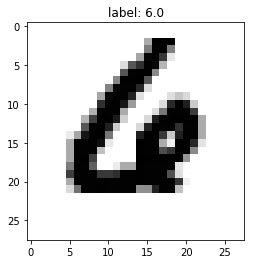

In [59]:
index = 40000
plt.imshow(X[index].reshape(28,28), cmap=matplotlib.cm.binary)
plt.title('label: {}'.format(y[index]))

In [60]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [61]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [62]:
unique, counts = np.unique(y_train_5, return_counts=True)
dict(zip(unique, counts))

{False: 54579, True: 5421}

In [63]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [64]:
sgd_clf.score(X_train, y_train_5), sgd_clf.score(X_test, y_test_5)

(0.96479999999999999, 0.96709999999999996)

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled =  scaler.transform(X_test)

C:\Users\yonggyu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [66]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_scaled, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [67]:
sgd_clf.score(X_train_scaled, y_train_5), sgd_clf.score(X_test_scaled, y_test_5)

(0.97018333333333329, 0.96999999999999997)

In [68]:
y_train_pred = sgd_clf.predict(X_train_scaled)

## Confusion matrix

In [69]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve
confmat = confusion_matrix(y_train_5, y_train_pred)
confmat

array([[54130,   449],
       [ 1340,  4081]])

### Precision

In [70]:
precision = confmat[1,1]/(confmat[0,1]+confmat[1,1])
precision

0.9008830022075055

In [71]:
from sklearn.metrics import precision_score
precision_score(y_train_5, y_train_pred)

0.9008830022075055

### Recall

In [72]:
recall = confmat[1,1]/(confmat[1,0]+confmat[1,1])
recall

0.75281313410809814

In [73]:
from sklearn.metrics import recall_score
recall_score(y_train_5, y_train_pred)

0.75281313410809814

### f1 score

In [74]:
2*(recall * precision)/(recall + precision)

0.8202190734599536

In [75]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.8202190734599536

### ROC curves

In [76]:
y_train_scores = sgd_clf.decision_function(X_train_scaled)

In [77]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_train_scores)

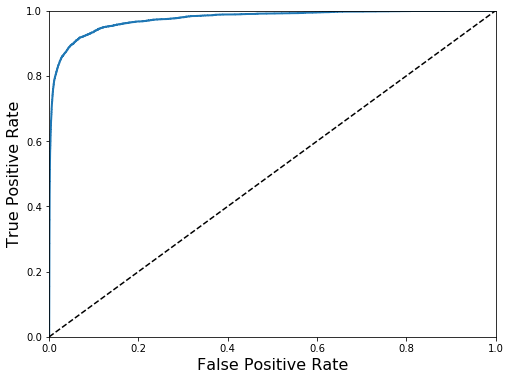

In [78]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

### AUC (Area Under the Curve)

In [80]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_train_scores)

0.97527270836042057

# Cross validation

In [81]:
sgd_clf = SGDClassifier(random_state=42)

In [82]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train_scaled, y_train_5, cv=3, scoring="accuracy")

array([ 0.96835,  0.96625,  0.9682 ])

In [83]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train_5, cv=3)

In [84]:
confusion_matrix(y_train_5, y_train_pred)

array([[54013,   566],
       [ 1378,  4043]])

In [85]:
y_scores = cross_val_predict(sgd_clf, X_train_scaled, y_train_5, cv=3,
                             method="decision_function")

In [86]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [87]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.97228076005469644

In [88]:
precision_score(y_train_5, y_train_pred)

0.87719678889129959

In [89]:
recall_score(y_train_5, y_train_pred)

0.74580335731414871

## ROC of Random Forests

In [90]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train_scaled, y_train_5, cv=3,
                                    method="predict_proba")

In [91]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

Plot ROC curves of SGD and Random Forest

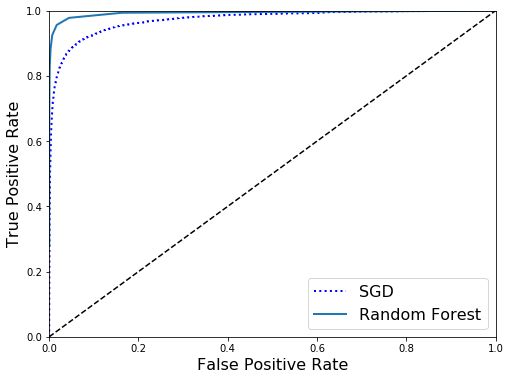

In [92]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [93]:
roc_auc_score(y_train_5, y_scores_forest)

0.99313312247174479

In [94]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.98529734474434938

In [95]:
recall_score(y_train_5, y_train_pred_forest)

0.82826046854823832